In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
import random

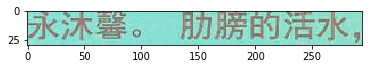

In [2]:
src = cv2.imread('造图测试图像/610简体新字体补充_1.jpg')
plt.imshow(src)
plt.show()

In [4]:
def under_line(src):
    
    img= np.array(src)
    chose_color =random.randint(0,1)
    if chose_color==0:
        color = ( random.randint(0,255),  random.randint(0,255),  random.randint(0,255)) #4
    else:
        color=(0,0,0)
    thickness=random.randint(1,3)
    y=int(img.shape[0]*(30/32))
    cv2.line(img, (1, y), (img.shape[1], y), color=color,thickness=thickness) 
    plt.imshow(img)
    plt.show()

root = '造图测试图像'
pics = os.listdir(root)
for p in pics:
    img = os.path.join(root,p)
#     src = cv2.imread(img)
#     under_line(src)

In [51]:
## 运动模糊效果

def motion_blur(image):
    
    degree=random.randint(5,10)
    angle=random.randint(45,60)
    
    image = np.array(image)
 
    # 这里生成任意角度的运动模糊kernel的矩阵， degree越大，模糊程度越高
    M = cv2.getRotationMatrix2D((degree / 2, degree / 2), angle, 1)
    motion_blur_kernel = np.diag(np.ones(degree))
    motion_blur_kernel = cv2.warpAffine(motion_blur_kernel, M, (degree, degree))
 
    motion_blur_kernel = motion_blur_kernel / degree
    blurred = cv2.filter2D(image, -1, motion_blur_kernel)
 
    # convert to uint8
    cv2.normalize(blurred, blurred, 0, 255, cv2.NORM_MINMAX)
    blurred = np.array(blurred, dtype=np.uint8)

    return blurred

In [52]:
## 高斯模糊
def Gaussian_blur(src):
    img_ = cv2.GaussianBlur(src, ksize=(7, 7), sigmaX=0, sigmaY=0)
    plt.imshow(img_)
    plt.show()

In [55]:
## 
def draw_random_shape(src):
    img= np.array(src)
    n = random.randint(1,3)
    for i in range(n):
        color = ( random.randint(0,255),  random.randint(0,255),  random.randint(0,255)) #4

        x1 = random.randint(0,img.shape[1]-1)
        x2 = random.randint(0,img.shape[1]-1)
        y1 = random.randint(0,img.shape[0]-1)
        y2 = random.randint(0,img.shape[0]-1)
        r =random.randint(5,50)
        thickness=random.randint(1,2)
        
        
        
        
        line =random.randint(0,2)
        if line==2:
            cv2.line(img, (x1, y1), (x2, y2), color=color,thickness=thickness) 
            continue
        rect =random.randint(0,2)    
        if rect ==2:
            cv2.rectangle(img, (x1, y1), (x2, y2), color=color,thickness=thickness) 
            continue
        cv2.circle(img, (x1, y1),  r,color=color,thickness=thickness) 

    return img

In [5]:
for i in range(10):
    img = motion_blur(draw_random_shape(src))

    plt.imshow(img)
    plt.show()

In [203]:
def enhance(src):
    kernel_sharpen_1 = np.array([
            [-1,-1,-1],
            [-1,9,-1],
            [-1,-1,-1]])
    kernel_sharpen_2 = np.array([
            [1,1,1],
            [1,-7,1],
            [1,1,1]])
    kernel_sharpen_3 = np.array([
            [-1,-1,-1,-1,-1],
            [-1,2,2,2,-1],
            [-1,2,8,2,-1],
            [-1,2,2,2,-1], 
            [-1,-1,-1,-1,-1]])/8.0
    #卷积
    output_1 = cv2.filter2D(src,-1,kernel_sharpen_1)
    output_2 = cv2.filter2D(src,-1,kernel_sharpen_2)
    output_3 = cv2.filter2D(src,-1,kernel_sharpen_3)

    plt.imshow(output_2*output_3*output_1)
    plt.show()

In [1]:
a='#660066 #003366 #008000 #ffd700 #ffa500 #0066dc #ffc3a0 #079fab #ab07a5 #7e082a #710c4c #6c78a7 #6c78a7 #a3ff00 #7fffd4 #ff9ca6 #4b3621 #60aef6 #190533 #450e3e'
As=a.split(' ')
print(As)

['#660066', '#003366', '#008000', '#ffd700', '#ffa500', '#0066dc', '#ffc3a0', '#079fab', '#ab07a5', '#7e082a', '#710c4c', '#6c78a7', '#6c78a7', '#a3ff00', '#7fffd4', '#ff9ca6', '#4b3621', '#60aef6', '#190533', '#450e3e']


In [47]:
## 叠加光线滤镜
def add_lights(src):
    lights_path = '/data1/ml/ocr/TextRecognitionDataGenerator/TextRecognitionDataGenerator/渐变曝光'
    jpgs = os.listdir(lights_path)
    I =random.randint(0,len(jpgs)-1)
    background = cv2.imread(os.path.join(lights_path,jpgs[I]),0)
    background =cv2.cvtColor(background,cv2.COLOR_GRAY2BGR)
    L=int(max(src.shape)*1.2)
    background = cv2.resize(background,(src.shape[1],src.shape[0]))
#     print(background.shape)
    
    
#     H=random.randint(0,background.shape[0]-src.shape[0]-1)
#     W=random.randint(0,background.shape[1]-src.shape[1]-1)
#     print((H,W))
    
    
    
    
#     ROI = (background[H:H+src.shape[0],W:W+src.shape[1],:])
#     print(ROI.shape)
#     print(src.shape)
    
#     assert (ROI.shape == src.shape)
    
    alpha = random.randint(9,10)
    beta = random.randint(5,10)
    dst=cv2.addWeighted(src, 1, background,beta/5., 0)
    
    plt.imshow(background)
    plt.show()
    plt.imshow(dst)
    plt.show()

In [6]:
for i in range(30):
    add_lights(src)

In [150]:
## 反转滤镜
def color_convert(src):
    img_info=src.shape
    image_height=img_info[0]
    image_weight=img_info[1]
    dst=np.zeros((image_height,image_weight,3),np.uint8)
    for i in range(image_height):
        for j in range(image_weight):
            (b,g,r)=src[i][j]
            dst[i][j]=(255-b,255-g,255-r)

    plt.imshow(dst)
    plt.show()
    return dst

In [45]:
# 椒盐滤镜
def saltpepper(img,n):
    m=int((img.shape[0]*img.shape[1])*n)
    for a in range(m):
        i=int(np.random.random()*img.shape[1])
        j=int(np.random.random()*img.shape[0])
        if img.ndim==2:
            img[j,i]=255
        elif img.ndim==3:
            img[j,i,0]=255
            img[j,i,1]=255
            img[j,i,2]=255
    for b in range(m):
        i=int(np.random.random()*img.shape[1])
        j=int(np.random.random()*img.shape[0])
        if img.ndim==2:
            img[j,i]=0
        elif img.ndim==3:
            img[j,i,0]=0
            img[j,i,1]=0
            img[j,i,2]=0
        
    plt.imshow(img)
    plt.show()
    return img

In [46]:
## 模糊丢失滤镜
def Lost_info(src):
    img=cv2.resize(src,(int(src.shape[1]/2),int(src.shape[0]/2)))
    img=cv2.resize(img,(src.shape[1],src.shape[0]))

    return img